# Масштабирование данных

## Для чего нужно масштабирование

Давайте обучим модель для регрессии из `sklearn` на датасете про недвижимость.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Разобьем выборку на обучение и тест с помощью `train_test_split`.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

Инициализируем модель `KNeighborsRegressor` для задачи регрессии из `sklearn`.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

И обучаем на обучающей выборке.

In [ ]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

И теперь можем посчитать метрику качества.

Про метрики качества для задачи регрессии можете посмотреть [здесь](https://youtu.be/vh2smjQyhp8)

In [ ]:
from sklearn.metrics import r2_score

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)


print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.45
Test R2 0.18


А метрики получаются совсем плохие.

Давайте попробуем другую модель.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

И так же сделаем предсказания этой моделью.

In [ ]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)


print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.61
Test R2 0.60


Метрики уже выше, но не настолько хорошие, чтобы пускать модель к реальным данным.

Здесь модель линейная, простая, поэтому и высокого качества могли и не ожидать.

Давайте возьмем ещё другую модель, может быть задача очень сложная, что наши предыдущие модели машинного обучения не справляются с ней.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_1 = DecisionTreeRegressor(random_state=1, max_depth=9)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

И так же сделаем предсказания этой моделью.

In [ ]:
pred_train = tree_1.predict(X_train)
pred_test = tree_1.predict(X_test)


print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.79
Test R2 0.72


Ну вот, совсем другое дело, значит проблема не в данных, а в моделях, раз модель дерева решений обучилась.



### Что может быть не так с моделями?

А KNN, линейные модели и другие модели очень чувстительны к входным данным. Давайте глянем на эти данные.


In [ ]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Есть признаки с маленькими значениями (`MedInc`, `AveBedrms`), а есть признаки со значениями побольше (`Latitude`, `HouseAge`), а есть прям с очень большими значениями (`Population` и `AveOccup`).

Значения в признаках **отличаются на порядки** и это огромная **проблема** для чувствительных моделей.



Имея такие данные, модель может ошибочно считать, что раз признак большой (`Population`), то он полезный, но какие-нибудь маленькие признаки (`MedInc`) могут оказаться в разы полезней больших. А вот такие большие будут перетягивать на себя всё внимание модели.



А значит нужно наши признаки уравнивать, масштабировать, чтобы модель изначально считала, что всё признаки одинаково полезные и никому не давала перетягивать одеяло.

## Масштабирование данных

А есть два основных вида масштабирования данных: нормализация и стандартизация.

Пойдем по порядку.

### Нормализация

Для того, чтобы сделать нормализацию данных нужно посчитать в каждом признаке его минимум (min) и максимум (max), а затем сделать следующее вычисление:

$$x = \frac{x - min}{max - min}$$

После такого преобразования $min = 0, max = 1$.

#### Через sklearn

Давайте для начала обучим sklearn версию, а затем напишим свою реализацию.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

Нормализатор обучился, давайте посмотрим, какие были минимальные значения в признаках.

In [ ]:
mms.data_min_

array([   0.4999    ,    1.        ,    0.84615385,    0.33333333,
          3.        ,    0.69230769,   32.54      , -124.35      ])

In [ ]:
X_train.min()

MedInc          0.499900
HouseAge        1.000000
AveRooms        0.846154
AveBedrms       0.333333
Population      3.000000
AveOccup        0.692308
Latitude       32.540000
Longitude    -124.350000
dtype: float64

И посмотрим, какие были максимальные значения в признаках.

In [ ]:
mms.data_max_

array([ 1.50001000e+01,  5.20000000e+01,  1.41909091e+02,  3.40666667e+01,
        3.56820000e+04,  5.99714286e+02,  4.19500000e+01, -1.14310000e+02])

Кстати, небольшой лайфхак, если хотите видеть не научную запись с `e`, а обычную запись чисел, то можете воспользоваться следующей строчкой кода

In [ ]:
import numpy as np
np.set_printoptions(suppress=True)

In [ ]:
mms.data_max_

array([   15.0001    ,    52.        ,   141.90909091,    34.06666667,
       35682.        ,   599.71428571,    41.95      ,  -114.31      ])

In [ ]:
X_train.max()

MedInc           15.000100
HouseAge         52.000000
AveRooms        141.909091
AveBedrms        34.066667
Population    35682.000000
AveOccup        599.714286
Latitude         41.950000
Longitude      -114.310000
dtype: float64

А теперь можем нормализовать нашу обучающую выборку.

In [ ]:
mms.transform(X_train)

array([[0.13939808, 0.39215686, 0.03581217, ..., 0.00233227, 0.1360255 ,
        0.77988048],
       [0.14701177, 0.88235294, 0.03816278, ..., 0.00252513, 0.63336876,
        0.14043825],
       [0.32103695, 0.58823529, 0.02966471, ..., 0.00282055, 0.54091392,
        0.18525896],
       ...,
       [0.34714694, 0.09803922, 0.02877568, ..., 0.0050506 , 0.50797024,
        0.25498008],
       [0.11765355, 0.66666667, 0.01348573, ..., 0.00609956, 0.15302869,
        0.60956175],
       [0.15009448, 0.29411765, 0.02202461, ..., 0.00294788, 0.50584485,
        0.24601594]])

In [ ]:
X_train_norm = pd.DataFrame(mms.transform(X_train), columns=X_train.columns)
X_train_norm

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.139398,0.392157,0.035812,0.029696,0.101460,0.002332,0.136026,0.779880
1,0.147012,0.882353,0.038163,0.029968,0.022534,0.002525,0.633369,0.140438
2,0.321037,0.588235,0.029665,0.019907,0.041173,0.002821,0.540914,0.185259
3,0.160205,0.294118,0.027323,0.022704,0.048964,0.004528,0.161530,0.621514
4,0.101061,0.784314,0.031278,0.034030,0.026262,0.001939,0.275239,0.367530
...,...,...,...,...,...,...,...,...
16507,0.250003,0.705882,0.030225,0.021082,0.018078,0.002054,0.572795,0.181275
16508,0.048689,0.333333,0.011987,0.022423,0.053533,0.003393,0.153029,0.610558
16509,0.347147,0.098039,0.028776,0.018742,0.060456,0.005051,0.507970,0.254980
16510,0.117654,0.666667,0.013486,0.019703,0.060456,0.006100,0.153029,0.609562


Значения на первый взгляд стали меньше, давайте глянем через `describe()`

In [ ]:
X_train_norm.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,0.231956,0.541389,0.032506,0.022676,0.039882,0.003897,0.329404,0.475445
std,0.130436,0.247553,0.018406,0.014861,0.031845,0.010724,0.227318,0.199838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142019,0.333333,0.025438,0.019949,0.021918,0.002900,0.147715,0.253984
50%,0.209138,0.549020,0.031022,0.021210,0.032582,0.003548,0.182784,0.582669
75%,0.292396,0.705882,0.036928,0.022704,0.048404,0.004322,0.550478,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Действительно, минимальные значения везде равны 0, а максимальные везде равны 1.

И давайте вдобавок нормализуем тестовую выборку. При этом пользуемся `min` и `max` значениями с обучающей выборке, на тесте ничего никогда не считается.

In [ ]:
X_test_norm = pd.DataFrame(mms.transform(X_test), columns=X_train.columns)
X_test_norm.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,0.234496,0.544198,0.032414,0.022440,0.039816,0.004262,0.325244,0.478847
std,0.133330,0.243659,0.013532,0.010172,0.031321,0.032298,0.225655,0.198421
min,0.000000,0.000000,0.002015,0.003294,0.000056,0.000465,0.002125,0.004980
25%,0.143938,0.333333,0.025715,0.019910,0.022142,0.002904,0.148778,0.258715
50%,0.210390,0.549020,0.031240,0.021195,0.032680,0.003552,0.180659,0.584661
75%,0.294279,0.705882,0.036861,0.022743,0.047619,0.004325,0.548353,0.631474
max,1.000000,1.000000,0.436515,0.408432,0.451778,2.074450,0.988310,0.982072


При этом где-то мы не получили чистый 0 в `min` и 1 в `max`, это как раз-таки из-за того, что используем `min` и `max` с обучения.

В этом ничего страшного нет, на тесте нет цели получить сто процентный 0 и 1, цель - **перевести данные в такую же шкалу**, что получили на трейне.

Ведь действительно у нас на обучении самый густонаселенный дом вмещает 35к людей, а вот на тесте всего лишь 16к, меньше в два раза, чем на обучении, поэтому и максимальное значение в `Population` с теста оказывается на половине шкалы с обучения.

In [ ]:
X_train['Population'].max(), X_test['Population'].max()

(35682.0, 16122.0)

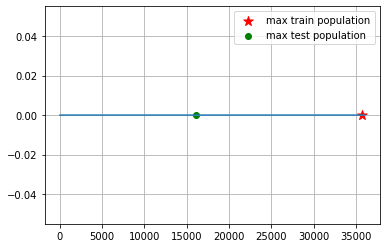

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(0, 36000)
y = 0 * x
plt.plot(x, y)
plt.scatter([X_train['Population'].max()], [0], label='max train population', marker='*', c='r', s=100)
plt.scatter([X_test['Population'].max()], [0], label='max test population', marker='o', c='g')
plt.grid()
plt.legend();

Тоже самое будет и в масштабированном виде.

In [ ]:
X_train_norm['Population'].max(), X_test_norm['Population'].max()

(1.0, 0.4517783570167325)

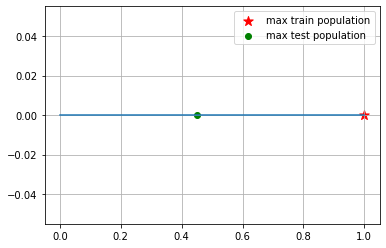

In [ ]:
x = np.linspace(0, 1, 5)
y = 0 * x
plt.plot(x, y)
plt.scatter([X_train_norm['Population'].max()], [0], label='max train population', marker='*', c='r', s=100)
plt.scatter([X_test_norm['Population'].max()], [0], label='max test population', marker='o', c='g')
plt.grid()
plt.legend();

Так что это абсолютная норма, что на тесте данные не принимают в максимальном 1, а в минимальном 0.

#### Самостоятельно

С sklearn версией разобрались, сейчас давайте напишим свой нормализатор.

Для начала нужно посчитать минимальные и максимальные значения в исходных данных.

In [ ]:
mins = X_train.min()
maxs = X_train.max()

display(mins, maxs)

MedInc          0.499900
HouseAge        1.000000
AveRooms        0.846154
AveBedrms       0.333333
Population      3.000000
AveOccup        0.692308
Latitude       32.540000
Longitude    -124.350000
dtype: float64

MedInc           15.000100
HouseAge         52.000000
AveRooms        141.909091
AveBedrms        34.066667
Population    35682.000000
AveOccup        599.714286
Latitude         41.950000
Longitude      -114.310000
dtype: float64

А затем нужно пройтись по всем признакам и вычесть минимум и поделть на разницу минимума и максимуму:

$$x = \frac{x - min}{max - min}$$


In [ ]:
X_train_my_norm = X_train.copy()

for col in X_train.columns:
    X_train_my_norm[col] = (X_train[col] - mins[col]) / (maxs[col] - mins[col])

X_train_my_norm.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,0.231956,0.541389,0.032506,0.022676,0.039882,0.003897,0.329404,0.475445
std,0.130436,0.247553,0.018406,0.014861,0.031845,0.010724,0.227318,0.199838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142019,0.333333,0.025438,0.019949,0.021918,0.002900,0.147715,0.253984
50%,0.209138,0.549020,0.031022,0.021210,0.032582,0.003548,0.182784,0.582669
75%,0.292396,0.705882,0.036928,0.022704,0.048404,0.004322,0.550478,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Или же такой проход в цикле могли бы заменить на более приятную операцию, работая со всеми признаками за раз.

In [ ]:
X_train_my_norm = (X_train - mins) / (maxs - mins)
X_train_my_norm.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,0.231956,0.541389,0.032506,0.022676,0.039882,0.003897,0.329404,0.475445
std,0.130436,0.247553,0.018406,0.014861,0.031845,0.010724,0.227318,0.199838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142019,0.333333,0.025438,0.019949,0.021918,0.002900,0.147715,0.253984
50%,0.209138,0.549020,0.031022,0.021210,0.032582,0.003548,0.182784,0.582669
75%,0.292396,0.705882,0.036928,0.022704,0.048404,0.004322,0.550478,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


И так же нормализуем тестовую выборку.

In [ ]:
X_test_my_norm = (X_test - mins) / (maxs - mins)
X_test_my_norm.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,0.234496,0.544198,0.032414,0.022440,0.039816,0.004262,0.325244,0.478847
std,0.133330,0.243659,0.013532,0.010172,0.031321,0.032298,0.225655,0.198421
min,0.000000,0.000000,0.002015,0.003294,0.000056,0.000465,0.002125,0.004980
25%,0.143938,0.333333,0.025715,0.019910,0.022142,0.002904,0.148778,0.258715
50%,0.210390,0.549020,0.031240,0.021195,0.032680,0.003552,0.180659,0.584661
75%,0.294279,0.705882,0.036861,0.022743,0.047619,0.004325,0.548353,0.631474
max,1.000000,1.000000,0.436515,0.408432,0.451778,2.074450,0.988310,0.982072


#### Обучение модели на масштабированных данных

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Для справки, что было до



```
Train R2 0.45
Test R2 0.18
```



И что стало после, а качество выросло очень прилично.

Вот в чём была проблема, в немасштабированных данных, в признаках, которые собой перекрывали все остальные признаки.

In [ ]:
pred_train = knn.predict(X_train_norm)
pred_test = knn.predict(X_test_norm)


print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.81
Test R2 0.70


Давайте попробуем другую модель.

In [ ]:
lr = LinearRegression()
lr.fit(X_train_norm, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Для справки, что было до



```
Train R2 0.61
Test R2 0.60
```



In [ ]:
pred_train = lr.predict(X_train_norm)
pred_test = lr.predict(X_test_norm)


print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.61
Test R2 0.60


А ничего сильно не поменялось, а это потому что **линейным моделям** больше подходит следующий метод масштабирования данных - **стандартизация** (ну или мы выжали все соки из линейно регрессии)

### Стандартизация

Для того, чтобы сделать стандартизацию данных нужно посчитать в каждом признаке его среднее значение (`mean`) и стандартное отклонение (`std`), а затем сделать следующее вычисление:

$$x = \frac{x - mean}{std}$$

После такого преобразования $mean = 0, std = 1$.

#### Через sklearn

И по-классике, для начала обучим sklearn версию, а затем напишим свою реализацию.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Стандартизатор обучился, посмотрим, какими были средние значения в признаках.

In [ ]:
scaler.mean_

array([   3.86330436,   28.61082849,    5.43161001,    1.09826536,
       1425.94797723,    3.0269867 ,   35.63968932, -119.57653706])

In [ ]:
X_train.mean()

MedInc           3.863304
HouseAge        28.610828
AveRooms         5.431610
AveBedrms        1.098265
Population    1425.947977
AveOccup         3.026987
Latitude        35.639689
Longitude     -119.576537
dtype: float64

И посмотрим, какие были стандартные отклонения в признаках.

In [ ]:
scaler.scale_

array([   1.89128773,   12.62480616,    2.59629804,    0.50128107,
       1136.1680751 ,    6.4238777 ,    2.1390021 ,    2.00630999])

In [ ]:
X_train.std()

MedInc           1.891345
HouseAge        12.625188
AveRooms         2.596377
AveBedrms        0.501296
Population    1136.202481
AveOccup         6.424072
Latitude         2.139067
Longitude        2.006371
dtype: float64

А теперь можем привести к стандартному виду нашу обучающую выборку.

In [ ]:
X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_train_std

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.709625,-0.602847,0.179607,0.472386,1.933739,-0.145955,-0.850719,1.523462
1,-0.651252,1.377381,0.307321,0.490737,-0.544768,-0.127971,1.337217,-1.676442
2,0.682972,0.189244,-0.154399,-0.186345,0.040533,-0.100424,0.930486,-1.452150
3,-0.550104,-0.998893,-0.281640,0.001908,0.285215,0.058794,-0.738517,0.730962
4,-1.003551,0.981336,-0.066721,0.764036,-0.427708,-0.182591,-0.238284,-0.540028
...,...,...,...,...,...,...,...,...
16507,0.138369,0.664499,-0.123953,-0.107235,-0.684712,-0.171880,1.070738,-1.472087
16508,-1.405077,-0.840475,-1.114885,-0.017000,0.428680,-0.046999,-0.775918,0.676135
16509,0.883153,-1.790984,-0.202702,-0.264699,0.646077,0.107527,0.785558,-1.103251
16510,-0.876336,0.506081,-1.033440,-0.200042,0.646077,0.205342,-0.775918,0.671151


Глянем на `describe()`

In [ ]:
X_train_std.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,1.344747e-20,2.056790e-17,2.323050e-16,9.214177e-17,-6.575140e-17,-7.259868e-17,1.456926e-15,3.342395e-15
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-1.778367e+00,-2.187030e+00,-1.766152e+00,-1.525954e+00,-1.252410e+00,-3.634376e-01,-1.449129e+00,-2.379225e+00
25%,-6.895325e-01,-8.404746e-01,-3.840347e-01,-1.834951e-01,-5.641313e-01,-9.305279e-02,-7.992930e-01,-1.108235e+00
50%,-1.749360e-01,3.082594e-02,-8.066830e-02,-9.862835e-02,-2.292337e-01,-3.257503e-02,-6.450154e-01,5.365756e-01
75%,4.633857e-01,6.644990e-01,2.402373e-01,1.868945e-03,2.676118e-01,3.960738e-02,9.725613e-01,7.808051e-01
max,5.888472e+00,1.852636e+00,5.256618e+01,6.576830e+01,3.015051e+01,9.288584e+01,2.950119e+00,2.624987e+00


И тут небольшой лайфхак, если и в pandas хочется избавиться от научной записи чисел, то выполняйте следующую строку кода

In [ ]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [ ]:
X_train_std.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000
mean,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.7784,-2.1870,-1.7662,-1.5260,-1.2524,-0.3634,-1.4491,-2.3792
25%,-0.6895,-0.8405,-0.3840,-0.1835,-0.5641,-0.0931,-0.7993,-1.1082
50%,-0.1749,0.0308,-0.0807,-0.0986,-0.2292,-0.0326,-0.6450,0.5366
75%,0.4634,0.6645,0.2402,0.0019,0.2676,0.0396,0.9726,0.7808
max,5.8885,1.8526,52.5662,65.7683,30.1505,92.8858,2.9501,2.6250


И да, теперь среднее во всех признаках равно 0, а стандартное отклонение равно 1.

И давайте стандартизируем тестовую выборку. При этом пользуемся `mean` и `std` значениями с обучающей выборке, на тесте ничего никогда не считается.

In [ ]:
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_test_std.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,4128.0000,4128.0000,4128.0000,4128.0000,4128.0000,4128.0000,4128.0000,4128.0000
mean,0.0195,0.0113,-0.0050,-0.0159,-0.0021,0.0340,-0.0183,0.0170
std,1.0222,0.9843,0.7352,0.6845,0.9836,3.0118,0.9927,0.9929
min,-1.7784,-2.1870,-1.6567,-1.3043,-1.2506,-0.3201,-1.4398,-2.3543
25%,-0.6748,-0.8405,-0.3690,-0.1861,-0.5571,-0.0926,-0.7946,-1.0846
50%,-0.1653,0.0308,-0.0688,-0.0997,-0.2262,-0.0322,-0.6544,0.5465
75%,0.4778,0.6645,0.2366,0.0045,0.2430,0.0398,0.9632,0.7808
max,5.8885,1.8526,21.9507,25.9592,12.9348,193.0775,2.8987,2.5353


При этом та же самая история, где-то мы не получили чистый 0 в `mean` и 1 в `std`, это снова из-за того, что используем `mean` и `std` с обучения.

В этом ничего страшного нет, на тесте нет цели получить сто процентный 0 и 1, цель - **перевести данные в такую же шкалу**, что получили на трейне.

#### Самостоятельно

С sklearn версией разобрались, сейчас давайте напишим свой нормализатор.

Для начала нужно посчитать среднее и стандартное отклонение в исходных данных.

In [ ]:
means = X_train.mean()
stds = X_train.std()

display(means, stds)

MedInc          3.8633
HouseAge       28.6108
AveRooms        5.4316
AveBedrms       1.0983
Population   1425.9480
AveOccup        3.0270
Latitude       35.6397
Longitude    -119.5765
dtype: float64

MedInc          1.8913
HouseAge       12.6252
AveRooms        2.5964
AveBedrms       0.5013
Population   1136.2025
AveOccup        6.4241
Latitude        2.1391
Longitude       2.0064
dtype: float64

А затем нужно пройтись по всем признакам и вычесть среднее и поделить на стандартное отклонение:

$$x = \frac{x - mean}{std}$$


In [ ]:
X_train_my_std = X_train.copy()

for col in X_train.columns:
    X_train_my_std[col] = (X_train[col] - means[col]) / stds[col]

X_train_my_std.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000
mean,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.7783,-2.1870,-1.7661,-1.5259,-1.2524,-0.3634,-1.4491,-2.3792
25%,-0.6895,-0.8404,-0.3840,-0.1835,-0.5641,-0.0930,-0.7993,-1.1082
50%,-0.1749,0.0308,-0.0807,-0.0986,-0.2292,-0.0326,-0.6450,0.5366
75%,0.4634,0.6645,0.2402,0.0019,0.2676,0.0396,0.9725,0.7808
max,5.8883,1.8526,52.5646,65.7663,30.1496,92.8830,2.9500,2.6249


Или же такой проход в цикле могли бы заменить на более приятную операцию, работая со всеми признаками за раз.

In [ ]:
X_train_my_std = (X_train - means) / stds
X_train_my_std.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000
mean,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.7783,-2.1870,-1.7661,-1.5259,-1.2524,-0.3634,-1.4491,-2.3792
25%,-0.6895,-0.8404,-0.3840,-0.1835,-0.5641,-0.0930,-0.7993,-1.1082
50%,-0.1749,0.0308,-0.0807,-0.0986,-0.2292,-0.0326,-0.6450,0.5366
75%,0.4634,0.6645,0.2402,0.0019,0.2676,0.0396,0.9725,0.7808
max,5.8883,1.8526,52.5646,65.7663,30.1496,92.8830,2.9500,2.6249


И так же стандартизируем тестовую выборку.

In [ ]:
X_test_my_std = (X_test - means) / stds
X_test_my_std.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,4128.0000,4128.0000,4128.0000,4128.0000,4128.0000,4128.0000,4128.0000,4128.0000
mean,0.0195,0.0113,-0.0050,-0.0159,-0.0021,0.0340,-0.0183,0.0170
std,1.0222,0.9843,0.7352,0.6845,0.9835,3.0117,0.9927,0.9929
min,-1.7783,-2.1870,-1.6566,-1.3043,-1.2506,-0.3201,-1.4397,-2.3542
25%,-0.6748,-0.8404,-0.3690,-0.1861,-0.5571,-0.0926,-0.7946,-1.0845
50%,-0.1653,0.0308,-0.0688,-0.0997,-0.2261,-0.0322,-0.6543,0.5465
75%,0.4778,0.6645,0.2366,0.0045,0.2430,0.0398,0.9632,0.7808
max,5.8883,1.8526,21.9501,25.9584,12.9344,193.0717,2.8986,2.5352


#### Обучение модели на масштабированных данных

Снова повторим обучение моделей, но уже на стандартизированных данных.

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train_std, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Для справки, что было до



```
исходные данные
Train R2 0.45
Test R2 0.18

после нормализации
Train R2 0.81
Test R2 0.70
```



И снова качество выросло, при этом здесь оно такое же, как и после нормализации данных.

In [ ]:
pred_train = knn.predict(X_train_std)
pred_test = knn.predict(X_test_std)


print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.81
Test R2 0.70


Давайте попробуем другую модель.

In [ ]:
lr = LinearRegression()
lr.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Для справки, что было до



```
исходные данные
Train R2 0.61
Test R2 0.60

после нормализации
Train R2 0.61
Test R2 0.60
```



In [ ]:
pred_train = lr.predict(X_train_std)
pred_test = lr.predict(X_test_std)


print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.61
Test R2 0.60


И здесь сильно не поменялось, делаем вывод, что в этом случае наши данные не вызывают дискомфорта у линейной модели, хоть масштабируй, хоть нет, результат будет одинаковым.

Но уж точно лишним не будет сделать масштабирование данных для таких моделей.

Ради интереса можем обучить и дерево решений и сравнить его метрики.

In [ ]:
tree_2 = DecisionTreeRegressor(random_state=1, max_depth=9)
tree_2.fit(X_train_norm, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

```
метрики до
Train R2 0.79
Test R2 0.72
```

In [ ]:
pred_train = tree_2.predict(X_train_norm)
pred_test = tree_2.predict(X_test_norm)


print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.79
Test R2 0.72


А в целом, так всё и осталось, ведь дереву решений без разницы, какой масштаб у признака, дерево решений задает вопросы к данным.

А если мы применем масштабирование, то вопросы к признакам не поменяются, поменяется только значение, с которым сравнивается вопрос.

А если забыли, как строится **дерево решений**, то можете вспомнить, посмотрев [здесь](https://youtube.com/playlist?list=PLkJJmZ1EJno5eV954-PwtRJAw2lE6s-w1)

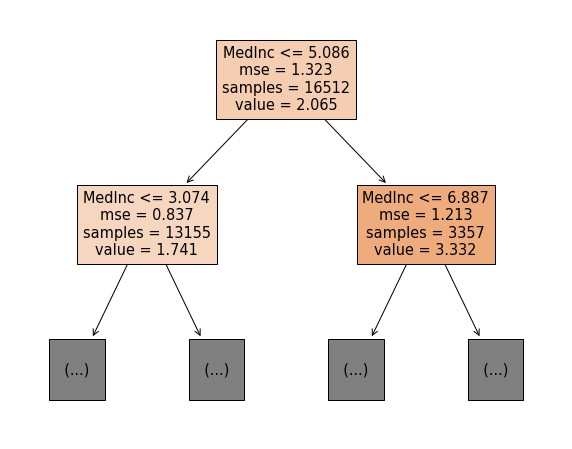

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(tree_1, max_depth=1, filled=True, feature_names=X_train.columns);

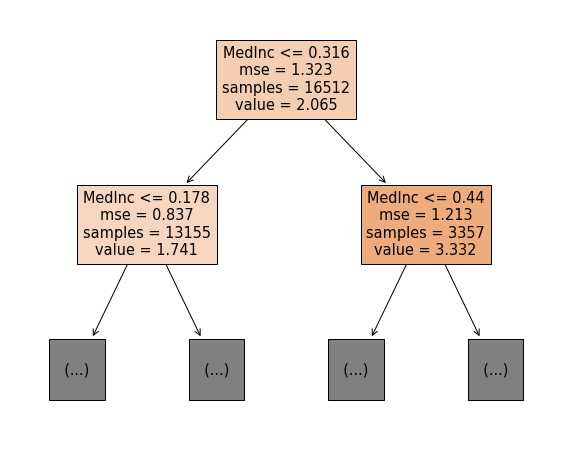

In [ ]:
plt.figure(figsize=(10, 8))
plot_tree(tree_2, max_depth=1, filled=True, feature_names=X_train.columns);

## Summary

Вот мы и разобрались, зачем нужно масштабирование данных и как его применять.

- Масштабирование данных нужно для более **стабильного** обучения модели.
- Есть два основных вида масштабирование
    1. ***Нормализация***
        - После min = 0, max = 1 у всех признаков
        - Подход лучше зарекомендовал себя в подходах МЛ, которые работают с расстояниями (KNN)
    2. ***Стандартизация***
        - После mean = 0, std = 1 у всех признаков
        - Подход лучше зарекомендовал себя в линейных подходах МЛ (LinearRegression, SVM)
- Для моделей, основанных не **дереве решений** (DecisionTree, Bagging, RandomForest, Boosting) масштабирование данных **необязательно**